**Step 1: Import Libraries, as per the needs of your project, you add more later if needed.**

In [365]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

**Step 2: Get the HTML in a string, in a variable**

Way 1: Directly through request.get

In [366]:
response1 = requests.get("https://visaguide.world/asia/")
response1 = response1.text
type(response1)

str

Way 2: Inspecting and Copying Outer HTML of the webpage, in particular the table, in a text file, and then reading it to get the html content in a string

In [367]:
with open("tabledata.txt", "r") as file:
  response2 = file.read()

type(response2)

str

**Step 3: Making a Beautiful Soup object with help of the string that we got, and the "html.parser"**

Way 1

In [368]:
densitysoup1 = BeautifulSoup(response1, "html.parser")
type(densitysoup1)

bs4.BeautifulSoup

Way 2

In [369]:
densitysoup2 = BeautifulSoup(response2, "html.parser")
type(densitysoup2)

bs4.BeautifulSoup

**Step 4: Find the table**

Way 1: Since in this way we have the whole html content, find all the tables, and then by checking the headings by <th> tag we gonna find which table is our table

In [370]:
densitytable1 = densitysoup1.find_all("table")
len(densitytable1)

3

In [371]:
headings0 = densitytable1[0].find_all("th")
headings0

[]

In [372]:
headings1 = densitytable1[1].find_all("th")
headings1

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [373]:
headings2 = densitytable1[2].find_all("th")
headings2

[<th>Language</th>, <th>Regions</th>, <th>Number of speakers</th>]

In [374]:
headings_list1 = [i.text for i in headings1]
headings_list1

['Country', 'Capital', 'Area km2', 'Population (2021)']

Way 2: Since we have only one table, using find we make that table

In [375]:
densitytable2 = densitysoup2.find("table")


In [376]:
headings_table2 = densitysoup2.find_all("th")
headings_table2

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [377]:
headings_list_table2 = [i.text for i in headings_table2]
headings_list_table2

['Country', 'Capital', 'Area km2', 'Population (2021)']

Checking we have same data or not

In [378]:
densitytable1[1]==densitytable2

False

Now we merge both ways, and make a single table

In [379]:
densitytable = densitytable2

**Step 5: Find the table contents**

# **Way 1: Directly go to 'th' and 'td' tags which are inside the 'tr' tags**



HEADER ROW

In [380]:
heading_tags = densitytable.find_all('th')
heading_tags

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [381]:
density_headings = [i.text for i in heading_tags]
density_headings

['Country', 'Capital', 'Area km2', 'Population (2021)']

ALL OTHER ROWS

In [382]:
row_tags = densitytable.find_all('td')
row_tags

[<td>Afghanistan</td>,
 <td>Kabul</td>,
 <td>652,864</td>,
 <td>39,835,428</td>,
 <td>Armenia</td>,
 <td>Yerevan</td>,
 <td>29,743</td>,
 <td>2,968,127</td>,
 <td>Azerbaijan</td>,
 <td>Baku</td>,
 <td>86,600</td>,
 <td>10,223,342</td>,
 <td>Bahrain</td>,
 <td>Manama</td>,
 <td>760</td>,
 <td>1,748,296</td>,
 <td>Bangladesh</td>,
 <td>Dhaka</td>,
 <td>147,570</td>,
 <td>166,303,498</td>,
 <td>Bhutan</td>,
 <td>Thimphu</td>,
 <td>38,394</td>,
 <td>779,898</td>,
 <td>Brunei</td>,
 <td>Bandar Seri Begawan</td>,
 <td>5,765</td>,
 <td>441,532</td>,
 <td>Cambodia</td>,
 <td>Phnom Penh</td>,
 <td>181,035</td>,
 <td>16,946,438</td>,
 <td>China (PRC)</td>,
 <td>Beijing</td>,
 <td>9,596,961</td>,
 <td>1,444,216,107</td>,
 <td>East Timor</td>,
 <td>Dili</td>,
 <td>14,874</td>,
 <td>1,343,873</td>,
 <td>Georgia</td>,
 <td>Tbilisi</td>,
 <td>69,700</td>,
 <td>3,979,765</td>,
 <td>Hong Kong</td>,
 <td>City of Victoria</td>,
 <td>2,755</td>,
 <td>7,552,810</td>,
 <td>India</td>,
 <td>New Delhi</td>,
 

In [383]:
densityrows = [i.text for i in row_tags]
densityrows

['Afghanistan',
 'Kabul',
 '652,864',
 '39,835,428',
 'Armenia',
 'Yerevan',
 '29,743',
 '2,968,127',
 'Azerbaijan',
 'Baku',
 '86,600',
 '10,223,342',
 'Bahrain',
 'Manama',
 '760',
 '1,748,296',
 'Bangladesh',
 'Dhaka',
 '147,570',
 '166,303,498',
 'Bhutan',
 'Thimphu',
 '38,394',
 '779,898',
 'Brunei',
 'Bandar Seri Begawan',
 '5,765',
 '441,532',
 'Cambodia',
 'Phnom Penh',
 '181,035',
 '16,946,438',
 'China (PRC)',
 'Beijing',
 '9,596,961',
 '1,444,216,107',
 'East Timor',
 'Dili',
 '14,874',
 '1,343,873',
 'Georgia',
 'Tbilisi',
 '69,700',
 '3,979,765',
 'Hong Kong',
 'City of Victoria',
 '2,755',
 '7,552,810',
 'India',
 'New Delhi',
 '3,287,263',
 '1,393,409,038',
 'Indonesia',
 'Jakarta',
 '1,904,569',
 '276,361,783',
 'Iran',
 'Tehran',
 '1,648,195',
 '85,028,759',
 'Iraq',
 'Baghdad',
 '438,317',
 '41,179,350',
 'Israel',
 'Jerusalem (disputed)',
 '20,770',
 '8,789,774',
 'Japan',
 'Tokyo',
 '377,915',
 '126,050,804',
 'Jordan',
 'Amman',
 '89,342',
 '10,269,021',
 'Kazakhst

**Step 6: Making Dictionary for DataFrame, then Making DataFrame**

Step 6.1: Understanding how dictionary should be made for DataFrame

In [384]:
from ast import Name
NameAgeData={}
NameAgeData['Name']=["Tom", "Jerry", "Donald", "Popeye"]
NameAgeData['Age'] =[80, 60, 100, 45]

print(NameAgeData)

{'Name': ['Tom', 'Jerry', 'Donald', 'Popeye'], 'Age': [80, 60, 100, 45]}


Convering Dictionary to DataFrame

In [385]:
df_nameage = pd.DataFrame(NameAgeData)
df_nameage

,Name,Age
0,Tom,80
1,Jerry,60
2,Donald,100
3,Popeye,45


Stage 6.2: Making Dictionary in same format using header row and other rows data


In [386]:
densitydict = {}
n = 0
for i in density_headings:
  densitydict[i] = [densityrows[j] for j in range(n, len(densityrows), len(density_headings))]
  n +=1

densitydict


{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen'],
 'Capital': ['Kabul',
  'Yerevan',
  'Baku',
  'Manama',
  'Dhaka',
  'Thimphu',
  'Bandar Seri Begawan',
  'Phnom Penh',
  'Beijing',
  'Dili',
  'Tbilisi',
  'City of Victoria',
  'New Delhi',
  'Jakarta',
  'Tehran',
  'Baghdad',
  'Jerusalem (disputed)',
  'Tokyo',
  'Am

Converting to DataFrame

In [387]:
densitydf = pd.DataFrame(densitydict)
densitydf.index = range(1, len(densitydf)+1)
densitydf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


# **Way 2: Go to 'tr' tags first**

In [388]:
allrows_tag = densitytable.find_all('tr')
allrows_tag

[<tr>
 <th>Country</th>
 <th>Capital</th>
 <th>Area km2</th>
 <th>Population (2021)</th>
 </tr>,
 <tr>
 <td>Afghanistan</td>
 <td>Kabul</td>
 <td>652,864</td>
 <td>39,835,428</td>
 </tr>,
 <tr>
 <td>Armenia</td>
 <td>Yerevan</td>
 <td>29,743</td>
 <td>2,968,127</td>
 </tr>,
 <tr>
 <td>Azerbaijan</td>
 <td>Baku</td>
 <td>86,600</td>
 <td>10,223,342</td>
 </tr>,
 <tr>
 <td>Bahrain</td>
 <td>Manama</td>
 <td>760</td>
 <td>1,748,296</td>
 </tr>,
 <tr>
 <td>Bangladesh</td>
 <td>Dhaka</td>
 <td>147,570</td>
 <td>166,303,498</td>
 </tr>,
 <tr>
 <td>Bhutan</td>
 <td>Thimphu</td>
 <td>38,394</td>
 <td>779,898</td>
 </tr>,
 <tr>
 <td>Brunei</td>
 <td>Bandar Seri Begawan</td>
 <td>5,765</td>
 <td>441,532</td>
 </tr>,
 <tr>
 <td>Cambodia</td>
 <td>Phnom Penh</td>
 <td>181,035</td>
 <td>16,946,438</td>
 </tr>,
 <tr>
 <td>China (PRC)</td>
 <td>Beijing</td>
 <td>9,596,961</td>
 <td>1,444,216,107</td>
 </tr>,
 <tr>
 <td>East Timor</td>
 <td>Dili</td>
 <td>14,874</td>
 <td>1,343,873</td>
 </tr>,
 <tr>


In [389]:
for i in allrows_tag[:1]:
  print(i)
  break

<tr>
<th>Country</th>
<th>Capital</th>
<th>Area km2</th>
<th>Population (2021)</th>
</tr>


HEADER ROW

In [390]:

for i in allrows_tag[:1]:
  headings_tag = i.find_all('th')
  print(headings_tag)
  headings = [j.text.strip() for j in heading_tags]
  print(headings)
#print(headings_tag)

#or
# headings_tag = [i.find_all('th') for i in allrows_tag[:1]]
# print(headings_tag)

[<th>Country</th>, <th>Capital</th>, <th>Area km2</th>, <th>Population (2021)</th>]
['Country', 'Capital', 'Area km2', 'Population (2021)']


ALL OTHER ROWS

In [391]:
flag = 0
other_rows = []
for i in allrows_tag[1:]:
  print(i)
  row_tags = i.find_all('td')
  print(row_tags)
  rows = [j.text.strip() for j in row_tags]
  other_rows.append(rows)
  if flag == 2:break
  flag +=1
print(other_rows)

<tr>
<td>Afghanistan</td>
<td>Kabul</td>
<td>652,864</td>
<td>39,835,428</td>
</tr>
[<td>Afghanistan</td>, <td>Kabul</td>, <td>652,864</td>, <td>39,835,428</td>]
<tr>
<td>Armenia</td>
<td>Yerevan</td>
<td>29,743</td>
<td>2,968,127</td>
</tr>
[<td>Armenia</td>, <td>Yerevan</td>, <td>29,743</td>, <td>2,968,127</td>]
<tr>
<td>Azerbaijan</td>
<td>Baku</td>
<td>86,600</td>
<td>10,223,342</td>
</tr>
[<td>Azerbaijan</td>, <td>Baku</td>, <td>86,600</td>, <td>10,223,342</td>]
[['Afghanistan', 'Kabul', '652,864', '39,835,428'], ['Armenia', 'Yerevan', '29,743', '2,968,127'], ['Azerbaijan', 'Baku', '86,600', '10,223,342']]


In [392]:
flag = 0
other_rows = []
for i in allrows_tag[1:]:
  #print(i)
  row_tags = i.find_all('td')
  #print(row_tags)
  rows = [j.text.strip() for j in row_tags]
  other_rows.append(rows)

print(other_rows)

[['Afghanistan', 'Kabul', '652,864', '39,835,428'], ['Armenia', 'Yerevan', '29,743', '2,968,127'], ['Azerbaijan', 'Baku', '86,600', '10,223,342'], ['Bahrain', 'Manama', '760', '1,748,296'], ['Bangladesh', 'Dhaka', '147,570', '166,303,498'], ['Bhutan', 'Thimphu', '38,394', '779,898'], ['Brunei', 'Bandar Seri Begawan', '5,765', '441,532'], ['Cambodia', 'Phnom Penh', '181,035', '16,946,438'], ['China (PRC)', 'Beijing', '9,596,961', '1,444,216,107'], ['East Timor', 'Dili', '14,874', '1,343,873'], ['Georgia', 'Tbilisi', '69,700', '3,979,765'], ['Hong Kong', 'City of Victoria', '2,755', '7,552,810'], ['India', 'New Delhi', '3,287,263', '1,393,409,038'], ['Indonesia', 'Jakarta', '1,904,569', '276,361,783'], ['Iran', 'Tehran', '1,648,195', '85,028,759'], ['Iraq', 'Baghdad', '438,317', '41,179,350'], ['Israel', 'Jerusalem (disputed)', '20,770', '8,789,774'], ['Japan', 'Tokyo', '377,915', '126,050,804'], ['Jordan', 'Amman', '89,342', '10,269,021'], ['Kazakhstan', 'Nur-Sultan', '2,724,900', '18,9

**Step 6: Making Dictionary for DataFrame AND then making a DataFrame**

Step 6.1: Understanding how dictionary should be made for DataFrame

In [393]:
from ast import Name
NameAgeData={}
NameAgeData['Name']=["Tom", "Jerry", "Donald", "Popeye"]
NameAgeData['Age'] =[80, 60, 100, 45]

print(NameAgeData)

{'Name': ['Tom', 'Jerry', 'Donald', 'Popeye'], 'Age': [80, 60, 100, 45]}


Convering Dictionary to DataFrame

In [394]:
df_nameage = pd.DataFrame(NameAgeData)
df_nameage

,Name,Age
0,Tom,80
1,Jerry,60
2,Donald,100
3,Popeye,45


Stage 6.2: Making Dictionary in same format using header row and other rows data


In [395]:
densitydict ={}
n=0
for i in headings:
  densitydict[i] = [other_rows[j][n] for j in range(len(other_rows))]
  break
densitydict

{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen']}

In [396]:
densitydict ={}
n=0
for i in headings:
  densitydict[i] = [other_rows[j][n] for j in range(len(other_rows))]
  n+=1
densitydict

{'Country': ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China (PRC)',
  'East Timor',
  'Georgia',
  'Hong Kong',
  'India',
  'Indonesia',
  'Iran',
  'Iraq',
  'Israel',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kuwait',
  'Kyrgyzstan',
  'Laos',
  'Lebanon',
  'Macau',
  'Malaysia',
  'Maldives',
  'Mongolia',
  'Myanmar',
  'Nepal',
  'North Korea',
  'Oman',
  'Pakistan',
  'Palestine',
  'Qatar',
  'Russia',
  'Saudi Arabia',
  'Singapore',
  'South Korea',
  'Sri Lanka',
  'Syria',
  'Taiwan',
  'Tajikistan',
  'Thailand',
  'The Philippines',
  'Turkey',
  'Turkmenistan',
  'United Arab Emirates',
  'Uzbekistan',
  'Vietnam',
  'Yemen'],
 'Capital': ['Kabul',
  'Yerevan',
  'Baku',
  'Manama',
  'Dhaka',
  'Thimphu',
  'Bandar Seri Begawan',
  'Phnom Penh',
  'Beijing',
  'Dili',
  'Tbilisi',
  'City of Victoria',
  'New Delhi',
  'Jakarta',
  'Tehran',
  'Baghdad',
  'Jerusalem (disputed)',
  'Tokyo',
  'Am

Making a Dataframe

In [397]:
densitydf = pd.DataFrame(densitydict)
densitydf.index = range(1, len(densitydf)+1)
densitydf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


**Step 7: Adding Population Density column**

Step 7.1 Converting both Area and Population columns values to integers

In [398]:
densitydf['Area km2']=densitydf['Area km2'].str.replace(",","").astype(int)
densitydf['Population (2021)']=densitydf['Population (2021)'].str.replace(",","").astype(int)

Step 7.2: Making a New Column "Population Density"

In [399]:
densitydf['Population Density']=densitydf['Population (2021)']/densitydf['Area km2']
densitydf

,Country,Capital,Area km2,Population (2021),Population Density
1,Afghanistan,Kabul,652864,39835428,61.016426
2,Armenia,Yerevan,29743,2968127,99.792455
3,Azerbaijan,Baku,86600,10223342,118.052448
4,Bahrain,Manama,760,1748296,2300.389474
5,Bangladesh,Dhaka,147570,166303498,1126.946520
6,Bhutan,Thimphu,38394,779898,20.313018
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378
8,Cambodia,Phnom Penh,181035,16946438,93.608628
9,China (PRC),Beijing,9596961,1444216107,150.486816
10,East Timor,Dili,14874,1343873,90.350477


Two decimal Places

In [400]:
densitydf['Population Density'] = densitydf['Population Density'].map('{:.2f}'.format)
densitydf['Population Density'] = densitydf['Population Density'].astype(float)
densitydf

,Country,Capital,Area km2,Population (2021),Population Density
1,Afghanistan,Kabul,652864,39835428,61.02
2,Armenia,Yerevan,29743,2968127,99.79
3,Azerbaijan,Baku,86600,10223342,118.05
4,Bahrain,Manama,760,1748296,2300.39
5,Bangladesh,Dhaka,147570,166303498,1126.95
6,Bhutan,Thimphu,38394,779898,20.31
7,Brunei,Bandar Seri Begawan,5765,441532,76.59
8,Cambodia,Phnom Penh,181035,16946438,93.61
9,China (PRC),Beijing,9596961,1444216107,150.49
10,East Timor,Dili,14874,1343873,90.35


Step 8: Change Name of Columns if necessary

In [401]:
densitydf.rename(columns={"Area km2": "Area(km2)", "Population (2021)": "Population"}, inplace=True)
densitydf

,Country,Capital,Area(km2),Population,Population Density
1,Afghanistan,Kabul,652864,39835428,61.02
2,Armenia,Yerevan,29743,2968127,99.79
3,Azerbaijan,Baku,86600,10223342,118.05
4,Bahrain,Manama,760,1748296,2300.39
5,Bangladesh,Dhaka,147570,166303498,1126.95
6,Bhutan,Thimphu,38394,779898,20.31
7,Brunei,Bandar Seri Begawan,5765,441532,76.59
8,Cambodia,Phnom Penh,181035,16946438,93.61
9,China (PRC),Beijing,9596961,1444216107,150.49
10,East Timor,Dili,14874,1343873,90.35


**Step 8: Make some plots that are meaningful**

Plot 1: Bar plot: Population Density vs Country

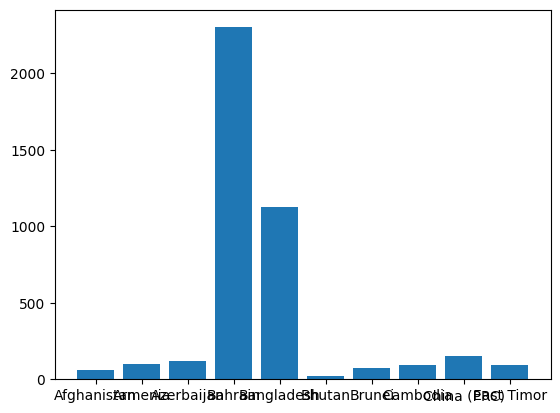

In [402]:
x = densitydf['Country'][:10]
y = densitydf['Population Density'][:10]
plt.bar(x,y)
plt.show()


Working on Overlap

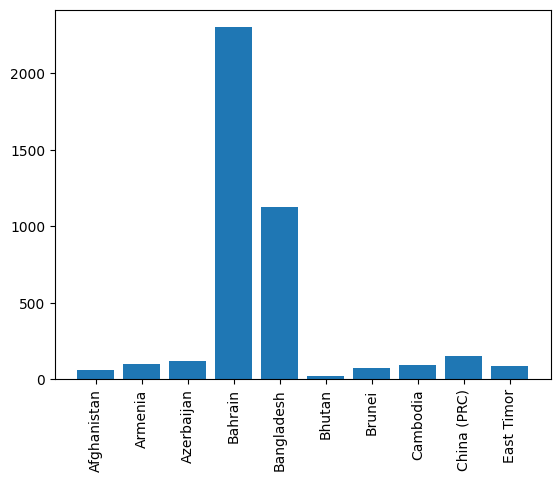

In [403]:
x = densitydf['Country'][:10]
y = densitydf['Population Density'][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

# Working on Irregular Data

Make a Sorted Dataframe which is sorted by Population Density, default: Ascending Order

In [404]:
densitydf_sorted = densitydf.sort_values(by="Population Density")
densitydf_sorted

,Country,Capital,Area(km2),Population,Population Density
28,Mongolia,Ulaanbaatar,1564116,3329289,2.13
20,Kazakhstan,Nur-Sultan,2724900,18994962,6.97
36,Russia,Moscow,17098242,145734038,8.52
47,Turkmenistan,Ashgabat,488100,6117924,12.53
37,Saudi Arabia,Riyadh,2149690,35340683,16.44
32,Oman,Muscat,309500,5223375,16.88
6,Bhutan,Thimphu,38394,779898,20.31
23,Laos,Vientiane,236800,7379358,31.16
22,Kyrgyzstan,Bishkek,199951,6628356,33.15
15,Iran,Tehran,1648195,85028759,51.59


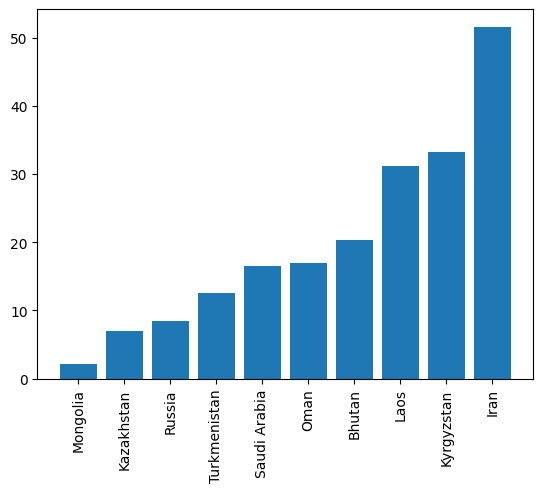

In [405]:
x = densitydf_sorted['Country'][:10]
y = densitydf_sorted['Population Density'][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Descending Order

In [406]:
densitydf_sorteddesc = densitydf.sort_values(by="Population Density", ascending = False)
densitydf_sorteddesc

,Country,Capital,Area(km2),Population,Population Density
38,Singapore,Singapore,697,5896686,8460.09
25,Macau,Macau,115,658394,5725.17
12,Hong Kong,City of Victoria,2755,7552810,2741.49
4,Bahrain,Manama,760,1748296,2300.39
27,Maldives,MalÃ©,298,543617,1824.22
5,Bangladesh,Dhaka,147570,166303498,1126.95
34,Palestine,Ramallah,6220,5222748,839.67
42,Taiwan,Taipei,36193,23855010,659.11
24,Lebanon,Beirut,10400,6769146,650.88
39,South Korea,Seoul,100210,51305186,511.98


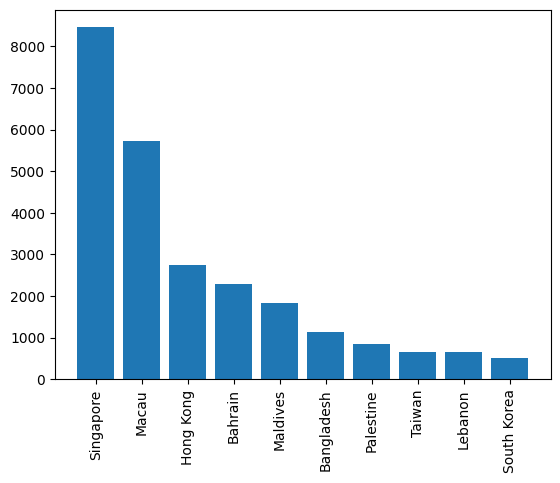

In [407]:
x = densitydf_sorteddesc['Country'][:10]
y = densitydf_sorteddesc['Population Density'][:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Population vs Population Density

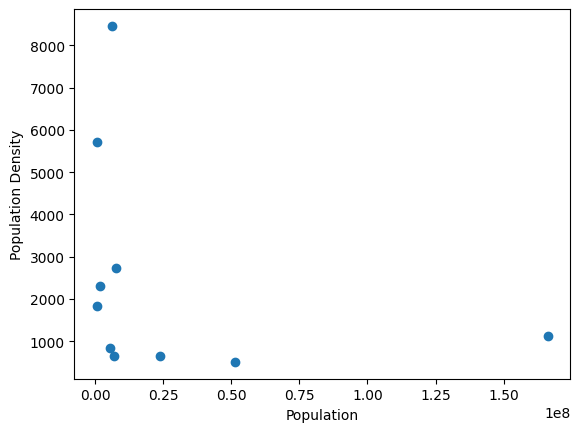

In [408]:
x = densitydf_sorteddesc['Population'][:10]
y = densitydf_sorteddesc['Population Density'][:10]
plt.xlabel("Population")
plt.ylabel("Population Density")
plt.scatter(x,y)

plt.show()

Handling 10^8 value, making a new column "Population(in million)"

In [409]:
densitydf['Population(million)'] = densitydf['Population']/10**6
densitydf

,Country,Capital,Area(km2),Population,Population Density,Population(million)
1,Afghanistan,Kabul,652864,39835428,61.02,39.835428
2,Armenia,Yerevan,29743,2968127,99.79,2.968127
3,Azerbaijan,Baku,86600,10223342,118.05,10.223342
4,Bahrain,Manama,760,1748296,2300.39,1.748296
5,Bangladesh,Dhaka,147570,166303498,1126.95,166.303498
6,Bhutan,Thimphu,38394,779898,20.31,0.779898
7,Brunei,Bandar Seri Begawan,5765,441532,76.59,0.441532
8,Cambodia,Phnom Penh,181035,16946438,93.61,16.946438
9,China (PRC),Beijing,9596961,1444216107,150.49,1444.216107
10,East Timor,Dili,14874,1343873,90.35,1.343873


Dropping an unnecssary column 'Population'

In [410]:
densitydf = densitydf.drop("Population", axis=1)

In [411]:
densitydf

,Country,Capital,Area(km2),Population Density,Population(million)
1,Afghanistan,Kabul,652864,61.02,39.835428
2,Armenia,Yerevan,29743,99.79,2.968127
3,Azerbaijan,Baku,86600,118.05,10.223342
4,Bahrain,Manama,760,2300.39,1.748296
5,Bangladesh,Dhaka,147570,1126.95,166.303498
6,Bhutan,Thimphu,38394,20.31,0.779898
7,Brunei,Bandar Seri Begawan,5765,76.59,0.441532
8,Cambodia,Phnom Penh,181035,93.61,16.946438
9,China (PRC),Beijing,9596961,150.49,1444.216107
10,East Timor,Dili,14874,90.35,1.343873


Plotting Population vs Population Density

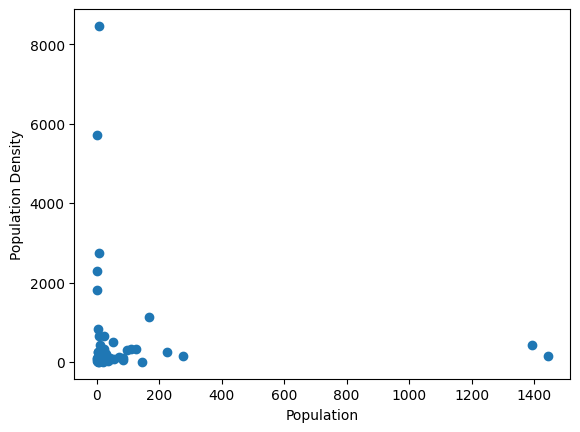

In [412]:
x = densitydf['Population(million)']
y = densitydf['Population Density']
plt.xlabel("Population")
plt.ylabel("Population Density")
plt.scatter(x,y)

plt.show()

Store the Data in CSV file

In [413]:
densitydf.to_csv("densitydata.csv")

# **Task 2: Get the GDP data from different URL**


In [414]:
gdpresponse = requests.get("https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP")
gdpresponse_text = gdpresponse.text

In [415]:
gdpsoup=BeautifulSoup(gdpresponse_text, "html.parser")

In [416]:
gdptables = gdpsoup.find_all("table")
len(gdptables)

2

In [417]:
heading_tags = gdptables[0].find_all("th")
heading_tags

[<th>Region<br/>rank
 </th>,
 <th>Country/Territory
 </th>,
 <th>2024 GDP (nominal) in billions
 </th>]

In [418]:
gdpheadings= [i.text.strip() for i in heading_tags]
gdpheadings

['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions']

In [419]:
row_tags=gdptables[0].find_all("td")
row_tags

[<td>—
 </td>,
 <td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
 </td>,
 <td><b>42.72 trillion</b>
 </td>,
 <td>1
 </td>,
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="China">China</a>
 </td>,
 <td>18.53  trillion<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span

In [420]:
rows = [i.text.strip() for i in row_tags]
rows[3:]

['1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'Uzbekistan',
 '101.8 billion',
 '27

In [421]:
gdprows = rows[3:]
gdprows

['1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'Uzbekistan',
 '101.8 billion',
 '27

In [422]:
gdpdict = {}
n = 0
for i in gdpheadings:
  gdpdict[i]= [gdprows[j] for j in range(n, len(gdprows), len(gdpheadings))]
  n += 1
gdpdict

{'Regionrank': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52'],
 'Country/Territory': ['China',
  'Japan',
  'India',
  'Russia',
  'South Korea',
  'Indonesia',
  'Turkey',
  'Saudi Arabia',
  'Taiwan',
  'Thailand',
  'Israel',
  'United Arab Emirates',
  'Singapore',
  'Philippines',
  'Vietnam',
  'Bangladesh',
  'Malaysia',
  'Iran',
  'Hong Kong\n(SAR)',
  'Pakistan',
  'Kazakhstan',
  'Iraq',
  'Qatar',
  'Kuwait',
  'Oman',
  'Uzbekistan',
  'Turkmenistan',
  'Sri Lanka',
  'Azerbaijan',
  'Myanmar',
  'Macau\n(SAR)',
  'Jordan',
  'Bahrain',
  'Nepal',
  'Cambodia',
  'Lebanon',
  'Cyprus',
  'Georgia',
  'Armenia',
  'North 

In [423]:
gdpdf = pd.DataFrame(gdpdict)
gdpdf.index = range(1, len(gdpdf)+1)
gdpdf

,Regionrank,Country/Territory,2024 GDP (nominal) in billions
1,1,China,18.53 trillion[2]
2,2,Japan,4.07 trillion[3]
3,3,India,3.88 trillion[4]
4,4,Russia,2.0 trillion
5,5,South Korea,1.76 trillion
6,6,Indonesia,1.47 trillion
7,7,Turkey,1.3 trillion
8,8,Saudi Arabia,1.11 trillion
9,9,Taiwan,803.0 billion
10,10,Thailand,548.9 billion


In [424]:
gdpdf.rename(columns={"Country/Territory":"Country", "2024 GDP (nominal) in billions":"GDP(billion)"}, inplace=True)
gdpdf

,Regionrank,Country,GDP(billion)
1,1,China,18.53 trillion[2]
2,2,Japan,4.07 trillion[3]
3,3,India,3.88 trillion[4]
4,4,Russia,2.0 trillion
5,5,South Korea,1.76 trillion
6,6,Indonesia,1.47 trillion
7,7,Turkey,1.3 trillion
8,8,Saudi Arabia,1.11 trillion
9,9,Taiwan,803.0 billion
10,10,Thailand,548.9 billion


In [425]:
finaldf = pd.merge(gdpdf,densitydf, on="Country", how='inner')
finaldf.index = range(1, len(finaldf)+1)
finaldf

,Regionrank,Country,GDP(billion),Capital,Area(km2),Population Density,Population(million)
1,2,Japan,4.07 trillion[3],Tokyo,377915,333.54,126.050804
2,3,India,3.88 trillion[4],New Delhi,3287263,423.88,1393.409038
3,4,Russia,2.0 trillion,Moscow,17098242,8.52,145.734038
4,5,South Korea,1.76 trillion,Seoul,100210,511.98,51.305186
5,6,Indonesia,1.47 trillion,Jakarta,1904569,145.10,276.361783
6,7,Turkey,1.3 trillion,Ankara,783562,108.53,85.042738
7,8,Saudi Arabia,1.11 trillion,Riyadh,2149690,16.44,35.340683
8,9,Taiwan,803.0 billion,Taipei,36193,659.11,23.855010
9,10,Thailand,548.9 billion,Bangkok,513120,136.32,69.950850
10,11,Israel,530.6 billion,Jerusalem (disputed),20770,423.20,8.789774


In [426]:
merged_df = pd.merge(densitydf, gdpdf, on="Country", how="outer", indicator=True)

unmatched_rows = merged_df[merged_df["_merge"] != "both"]
unmatched_rows

,Country,Capital,Area(km2),Population Density,Population(million),Regionrank,GDP(billion),_merge
8,China,NaN,NaN,NaN,NaN,1,18.53 trillion[2],right_only
9,China (PRC),Beijing,9596961.0,150.49,1444.216107,NaN,NaN,left_only
10,Cyprus,NaN,NaN,NaN,NaN,37,34.3 billion,right_only
11,East Timor,Dili,14874.0,90.35,1.343873,NaN,NaN,left_only
13,Hong Kong,City of Victoria,2755.0,2741.49,7.552810,NaN,NaN,left_only
14,Hong Kong\n(SAR),NaN,NaN,NaN,NaN,19,401.5 billion,right_only
27,Macau,Macau,115.0,5725.17,0.658394,NaN,NaN,left_only
28,Macau\n(SAR),NaN,NaN,NaN,NaN,31,54.7 billion,right_only
38,Philippines,NaN,NaN,NaN,NaN,14,471.5 billion,right_only
49,The Philippines,Manila,343448.0,323.33,111.046913,NaN,NaN,left_only


In [427]:
!pip install rapidfuzz

In [428]:
from rapidfuzz import fuzz, process

In [429]:
def fuzzy_match(value, choices, threshold=70):
  match,score,index=process.extractOne(value, choices)
  if score >=threshold:
    return match
  else:
    return None


In [430]:
df1 = gdpdf
df2 = densitydf

In [431]:
def fuzzy_match_country(country):
    return fuzzy_match(country, df2["Country"])

df1["matched_value"] = df1["Country"].apply(fuzzy_match_country)

## def fuzzy_match_country(country):
    return fuzzy_match(country, df2["Country"])

df1["matched_value"] = df1["Country"].apply(fuzzy_match_country)
df1

In [432]:
df1.rename(columns={'Country': 'Country(og)','matched_value': 'Country' }, inplace=True)
df1

,Regionrank,Country(og),GDP(billion),Country
1,1,China,18.53 trillion[2],China (PRC)
2,2,Japan,4.07 trillion[3],Japan
3,3,India,3.88 trillion[4],India
4,4,Russia,2.0 trillion,Russia
5,5,South Korea,1.76 trillion,South Korea
6,6,Indonesia,1.47 trillion,Indonesia
7,7,Turkey,1.3 trillion,Turkey
8,8,Saudi Arabia,1.11 trillion,Saudi Arabia
9,9,Taiwan,803.0 billion,Taiwan
10,10,Thailand,548.9 billion,Thailand


In [433]:
df1['Country']

1              China (PRC)
2                    Japan
3                    India
4                   Russia
5              South Korea
6                Indonesia
7                   Turkey
8             Saudi Arabia
9                   Taiwan
10                Thailand
11                  Israel
12    United Arab Emirates
13               Singapore
14         The Philippines
15                 Vietnam
16              Bangladesh
17                Malaysia
18                    Iran
19               Hong Kong
20                Pakistan
21              Kazakhstan
22                    Iraq
23                   Qatar
24                  Kuwait
25                    Oman
26              Uzbekistan
27            Turkmenistan
28               Sri Lanka
29              Azerbaijan
30                 Myanmar
31                   Macau
32                  Jordan
33                 Bahrain
34                   Nepal
35                Cambodia
36                 Lebanon
37                    None
3

In [434]:
ffinal_df = pd.merge(df2, df1, on ="Country", how="inner")
ffinal_df.index = range(1, len(ffinal_df)+1)
ffinal_df

,Country,Capital,Area(km2),Population Density,Population(million),Regionrank,Country(og),GDP(billion)
1,Afghanistan,Kabul,652864,61.02,39.835428,45,Afghanistan,17.1 billion
2,Armenia,Yerevan,29743,99.79,2.968127,39,Armenia,27.5 billion
3,Azerbaijan,Baku,86600,118.05,10.223342,29,Azerbaijan,80.9 billion
4,Bahrain,Manama,760,2300.39,1.748296,33,Bahrain,46.8 billion
5,Bangladesh,Dhaka,147570,1126.95,166.303498,16,Bangladesh,451.16 billion
6,Bhutan,Thimphu,38394,20.31,0.779898,51,Bhutan,3.31 billion
7,Brunei,Bandar Seri Begawan,5765,76.59,0.441532,47,Brunei,16.4 billion
8,Cambodia,Phnom Penh,181035,93.61,16.946438,35,Cambodia,45.2 billion
9,China (PRC),Beijing,9596961,150.49,1444.216107,1,China,18.53 trillion[2]
10,Georgia,Tbilisi,69700,57.10,3.979765,38,Georgia,36.6 billion


In [435]:
ffinal_df.drop("Regionrank", axis=1, inplace = True )

In [436]:
ffinal_df.drop("Country(og)", axis=1, inplace = True )

In [437]:
ffinal_df.head(10)

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion)
1,Afghanistan,Kabul,652864,61.02,39.835428,17.1 billion
2,Armenia,Yerevan,29743,99.79,2.968127,27.5 billion
3,Azerbaijan,Baku,86600,118.05,10.223342,80.9 billion
4,Bahrain,Manama,760,2300.39,1.748296,46.8 billion
5,Bangladesh,Dhaka,147570,1126.95,166.303498,451.16 billion
6,Bhutan,Thimphu,38394,20.31,0.779898,3.31 billion
7,Brunei,Bandar Seri Begawan,5765,76.59,0.441532,16.4 billion
8,Cambodia,Phnom Penh,181035,93.61,16.946438,45.2 billion
9,China (PRC),Beijing,9596961,150.49,1444.216107,18.53 trillion[2]
10,Georgia,Tbilisi,69700,57.10,3.979765,36.6 billion


In [438]:
ffinal_df['GDP(billion)'] = ffinal_df['GDP(billion)'].str.replace(r'\[\d\]', '', regex=True).str.strip()
ffinal_df

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion)
1,Afghanistan,Kabul,652864,61.02,39.835428,17.1 billion
2,Armenia,Yerevan,29743,99.79,2.968127,27.5 billion
3,Azerbaijan,Baku,86600,118.05,10.223342,80.9 billion
4,Bahrain,Manama,760,2300.39,1.748296,46.8 billion
5,Bangladesh,Dhaka,147570,1126.95,166.303498,451.16 billion
6,Bhutan,Thimphu,38394,20.31,0.779898,3.31 billion
7,Brunei,Bandar Seri Begawan,5765,76.59,0.441532,16.4 billion
8,Cambodia,Phnom Penh,181035,93.61,16.946438,45.2 billion
9,China (PRC),Beijing,9596961,150.49,1444.216107,18.53 trillion
10,Georgia,Tbilisi,69700,57.10,3.979765,36.6 billion


In [439]:
ffinal_df['GDP(billion)'] = ffinal_df['GDP(billion)'].str.replace(r'\[\d\]', '', regex=True).str.strip()
ffinal_df['GDP(billion)'] = ffinal_df['GDP(billion)'].str.replace(',', '', regex=True).str.strip()

In [440]:
ffinal_df.head()

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion)
1,Afghanistan,Kabul,652864,61.02,39.835428,17.1 billion
2,Armenia,Yerevan,29743,99.79,2.968127,27.5 billion
3,Azerbaijan,Baku,86600,118.05,10.223342,80.9 billion
4,Bahrain,Manama,760,2300.39,1.748296,46.8 billion
5,Bangladesh,Dhaka,147570,1126.95,166.303498,451.16 billion


In [441]:
for i in range(1, len(ffinal_df)+1):
    #ffinal_df.loc[i, 'GDP(billion)'] = ffinal_df.loc[i, 'GDP(billion)'].replace(",", "").strip()
    #print(ffinal_df['GDP(billion)'][i])
    if "billion" in ffinal_df['GDP(billion)'][i]:
      ffinal_df.loc[i, 'GDP(billion)'] = float(ffinal_df.loc[i, 'GDP(billion)'].replace("billion", "").strip())
      #print(ffinal_df['GDP(billion)'][i])
    elif "million" in ffinal_df['GDP(billion)'][i]:
      ffinal_df.loc[i, 'GDP(billion)'] = float(ffinal_df.loc[i, 'GDP(billion)'].replace("million", "").strip())/1000
      #print(ffinal_df['GDP(billion)'][i])
    elif "trillion" in ffinal_df['GDP(billion)'][i]:
      ffinal_df.loc[i, 'GDP(billion)'] = float(ffinal_df.loc[i, 'GDP(billion)'].replace("trillion", "").strip())*1000
      #print(ffinal_df['GDP(billion)'][i])


In [442]:
ffinal_df

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion)
1,Afghanistan,Kabul,652864,61.02,39.835428,17.1
2,Armenia,Yerevan,29743,99.79,2.968127,27.5
3,Azerbaijan,Baku,86600,118.05,10.223342,80.9
4,Bahrain,Manama,760,2300.39,1.748296,46.8
5,Bangladesh,Dhaka,147570,1126.95,166.303498,451.16
6,Bhutan,Thimphu,38394,20.31,0.779898,3.31
7,Brunei,Bandar Seri Begawan,5765,76.59,0.441532,16.4
8,Cambodia,Phnom Penh,181035,93.61,16.946438,45.2
9,China (PRC),Beijing,9596961,150.49,1444.216107,18530.0
10,Georgia,Tbilisi,69700,57.10,3.979765,36.6


In [443]:
ffinal_df['GDP Per Capita'] = (ffinal_df['GDP(billion)']*10**9)/(ffinal_df['Population(million)']*10**6)
ffinal_df['GDP Per Capita']=ffinal_df['GDP Per Capita'].astype(float).round(2)

In [444]:
ffinal_df.head()

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion),GDP Per Capita
1,Afghanistan,Kabul,652864,61.02,39.835428,17.1,429.27
2,Armenia,Yerevan,29743,99.79,2.968127,27.5,9265.10
3,Azerbaijan,Baku,86600,118.05,10.223342,80.9,7913.26
4,Bahrain,Manama,760,2300.39,1.748296,46.8,26768.92
5,Bangladesh,Dhaka,147570,1126.95,166.303498,451.16,2712.87


In [445]:
ffinal_df_sorted = ffinal_df.sort_values(by="GDP Per Capita", ascending=False)
ffinal_df_sorted

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion),GDP Per Capita
37,Singapore,Singapore,697,8460.09,5.896686,525.2,89066.98
24,Macau,Macau,115,5725.17,0.658394,54.7,83080.95
34,Qatar,Doha,11586,252.94,2.930528,223.3,76197.87
16,Israel,Jerusalem (disputed),20770,423.20,8.789774,530.6,60365.60
11,Hong Kong,City of Victoria,2755,2741.49,7.552810,401.5,53159.02
47,United Arab Emirates,Abu Dhabi,83600,119.51,9.991089,527.8,52827.07
20,Kuwait,Kuwait City,17818,242.93,4.328550,184.8,42693.28
7,Brunei,Bandar Seri Begawan,5765,76.59,0.441532,16.4,37143.40
38,South Korea,Seoul,100210,511.98,51.305186,1760.0,34304.52
41,Taiwan,Taipei,36193,659.11,23.855010,803.0,33661.69


In [446]:
ffinal_df_sorted.head()

,Country,Capital,Area(km2),Population Density,Population(million),GDP(billion),GDP Per Capita
37,Singapore,Singapore,697,8460.09,5.896686,525.2,89066.98
24,Macau,Macau,115,5725.17,0.658394,54.7,83080.95
34,Qatar,Doha,11586,252.94,2.930528,223.3,76197.87
16,Israel,Jerusalem (disputed),20770,423.20,8.789774,530.6,60365.60
11,Hong Kong,City of Victoria,2755,2741.49,7.552810,401.5,53159.02


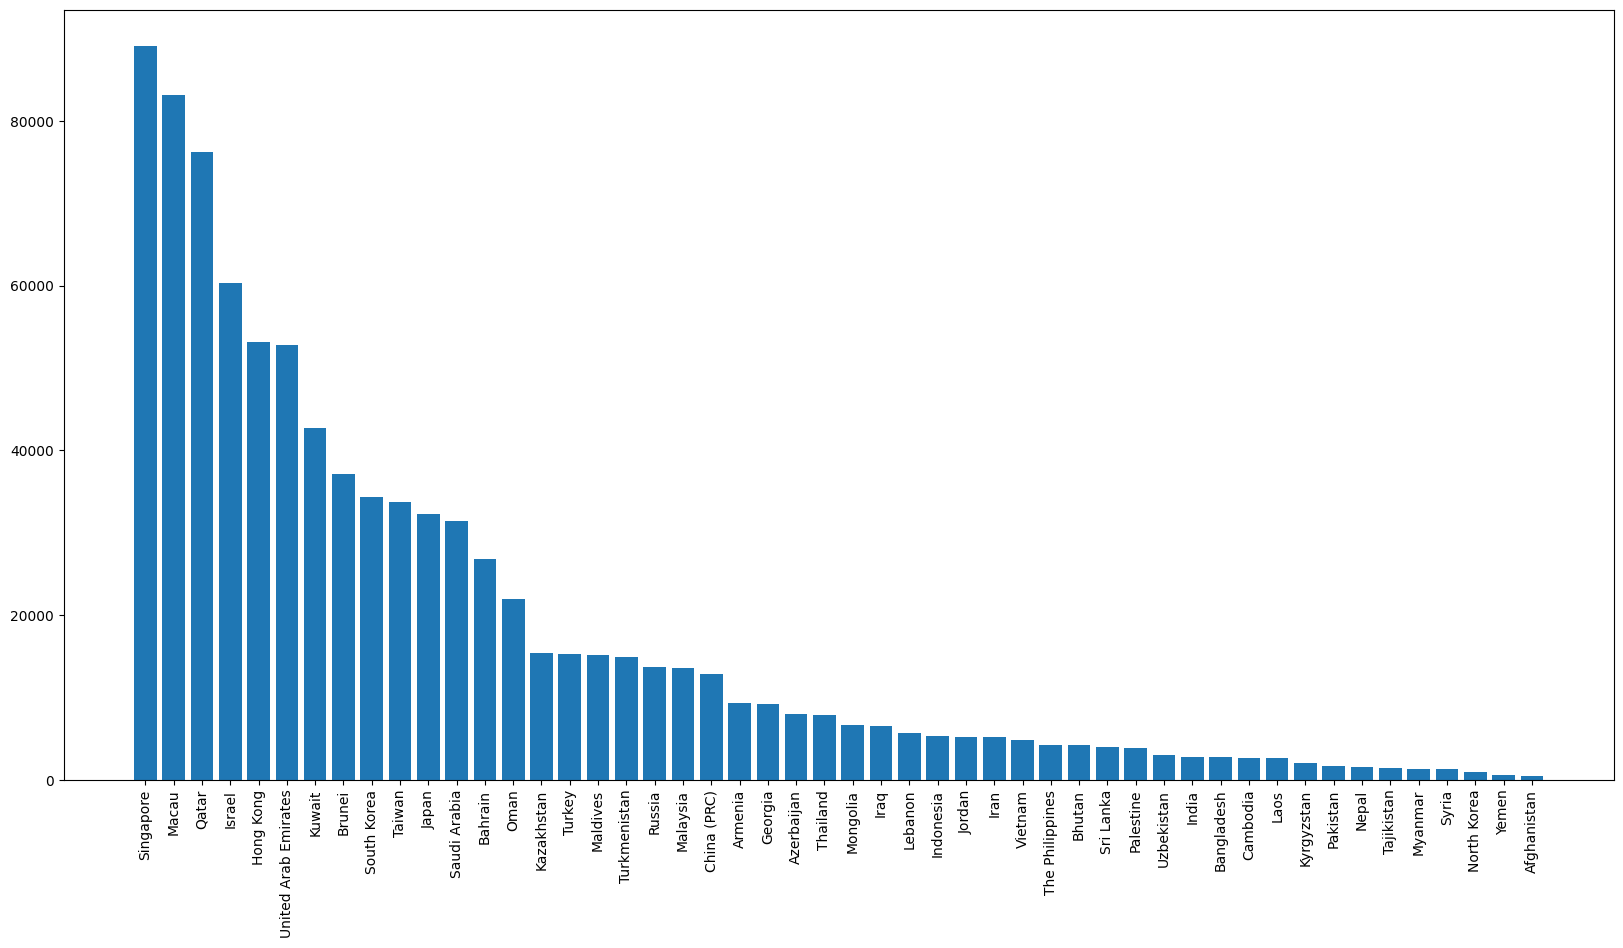

In [447]:
y = ffinal_df_sorted['GDP Per Capita']
x = ffinal_df_sorted['Country']
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90)

plt.bar(x, y)
plt.show()

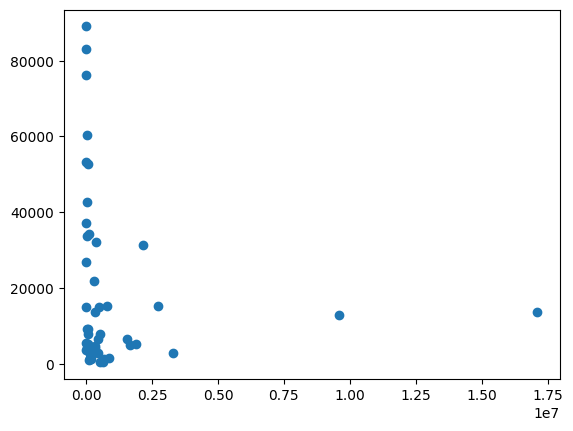

In [448]:
y = ffinal_df['GDP Per Capita']
x = ffinal_df['Area(km2)']
plt.scatter(x, y)
plt.show()

In [449]:
!pip install seaborn

In [453]:
import seaborn as sns

In [454]:
import numpy as np

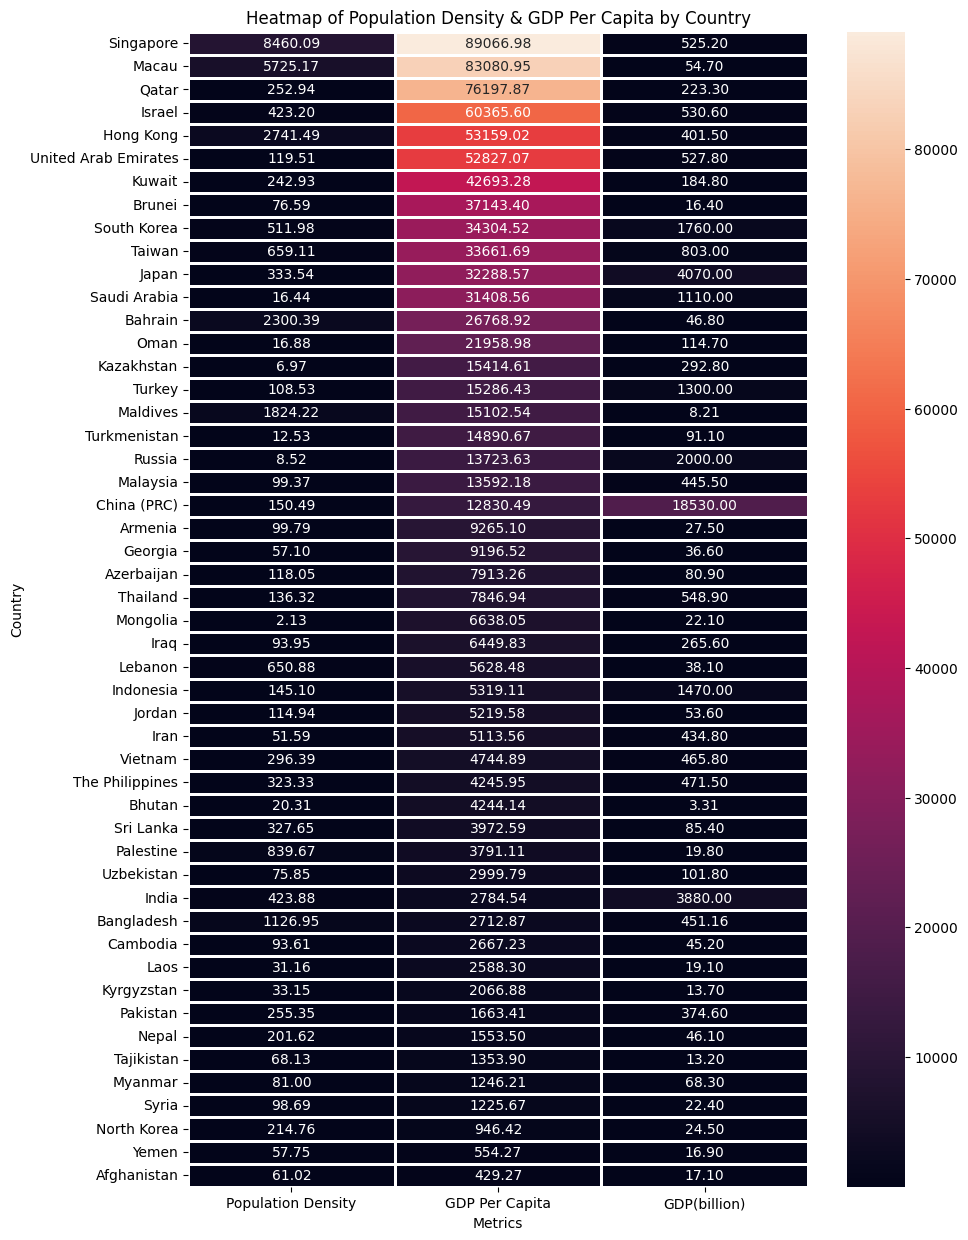

In [456]:
import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# Selecting the required columns
ffinal_df_sorted['GDP(billion)']=ffinal_df_sorted['GDP(billion)'].astype(float).round(2)
dff = ffinal_df_sorted[['Country', 'Population Density', 'GDP Per Capita', "GDP(billion)"]][:]

# Normalize values for better visualization
dff = dff.set_index('Country')  # Set country as index
# df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())  # Min-max scaling

# Plot heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(dff,annot = True, fmt = '.2f', linewidths = 0.8)
# sns.heatmap(df_norm, cmap='coolwarm',annot=True,linewidths=0.5)
#, cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f"
# Set title
plt.title('Heatmap of Population Density & GDP Per Capita by Country')
plt.xlabel('Metrics')
plt.ylabel('Country')

plt.show()